In [3]:
%pylab inline
from sklearn import datasets
from scipy import stats

plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


In [13]:
from sklearn import neighbors, naive_bayes, linear_model, svm, neural_network, model_selection

In [49]:
X = np.random.random(size=100)
y = 3*X**2 + 2*X + 1 + np.random.random(size=100)*0.1
X = [[xx, ] for xx in list(X) ]
for model, text in [
    [neighbors.KNeighborsRegressor(), 'knn'],
    [linear_model.LinearRegression(), 'linear'],
    [linear_model.Lasso(), 'lasso'],
    #[naive_bayes.GaussianNB(), 'NB'],
    [svm.SVR(kernel='linear'), 'linear svm'],
    [svm.SVR(kernel='rbf'), 'rbf svm'],
    [neural_network.MLPRegressor((200,),max_iter=10000), '200 MLP'],
    #[neural_network.MLPRegressor((2,)), '200 MLP'],
    ]:
    model.fit(X,y)
    #naive_bayes.BaseNB()
    print(text, np.mean(model_selection.cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)))

('knn', -0.007228148350488783)
('linear', -0.03397403349627846)
('lasso', -1.5440914197765099)
('linear svm', -0.04015895422919162)
('rbf svm', -0.00933802187838877)
('200 MLP', -0.04037702278943826)


In [2]:
def ml_plot(X, y, clf, ngrid=50, title=''):

    fig, ax = subplots()
    ax.scatter(X[:,0], X[:,1], c=y, cmap = 'spring')

    clf.fit(X,y)
    scores = model_selection.cross_val_score(clf, X, y)
    print('Evaluation result:\n\t', mean(scores), '\t', scores)

    x = np.linspace(min(X[:,0]), max(X[:,0]), ngrid)
    y = np.linspace(min(X[:,1]), max(X[:,1]), ngrid)
    yy, xx = np.meshgrid(y, x)
    P = np.zeros_like(xx)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.predict([[xi, yj]])
    # plot the margins
    ax.contour(xx, yy, P, levels=10) #colors='k',
               #levels=[-1, 0, 1], alpha=0.5,
               #linestyles=['--', '-', '--'])
    
    if title != '':
        ax.set_title(title, fontsize=14)
    plt.show()

# 3.2 随机森林 (Random Forest)，Adaptive boost，与 GBDT 

## 决策树的改进版本：随机森林

一种有多个决策树的分类方法。

决策树相当于一个大师，通过自己在数据集中学到的知识对于新的数据进行分类。但是俗话说得好，一个诸葛亮，玩不过三个臭皮匠。随机森林就是希望构建多个臭皮匠，希望最终的分类效果能够超过单个大师的一种算法。

那随机森林具体如何构建呢？有两个方面：数据的随机性选取，以及待选特征的随机选取。

1. 数据的随机选取：

首先，从原始的数据集中采取**有放回抽样**，构造子数据集。

子数据集的数据量是和原始数据集相同的。不同子数据集的元素可以重复，同一个子数据集中的元素也可以重复。

2. 利用子数据集来构建子决策树

将这个数据放到每个子决策树中，每个子决策树输出一个结果。

3. 数据特征也随机选取：

随机森林中的子树的每一个分裂过程并未用到所有的待选特征，而是从所有的待选特征中随机选取一定的特征。

这样能够使得随机森林中的决策树都能够彼此不同，提升系统的多样性，从而提升分类性能。

4. 投票决定最后结果

通过对子决策树的判断结果的投票，得到随机森林的输出结果。

## 优点

本质上，通过组合多个弱分类器，最终结果通过投票或取均值，使得整体模型的结果具有较高的精确度和泛化性能。

其可以取得不错成绩，主要归功于“随机”和“森林”。

**"随机"使它具有抗过拟合能力：**

    每个树选取使用的特征时，都是从全部特征中随机产生的，本身已经降低了过拟合的风险和趋势。
    
    模型不会被特定的特征值或者特征组合所决定。

    随机性的增加，将控制模型的拟合能力不会无限提高。

**"森林"使它更加精准:**

    由于采用了集成算法，本身精度比大多数单个算法要好

**其他优点：**

    随机森林不进行剪枝。决策树剪枝是因为防止过拟合，而随机森林的“随机”已经防止了过拟合，因此不需要剪枝。

    在数据分析上，由于随机性的引入，使得随机森林具有一定的**抗噪声能力**，对比其他算法具有一定优势
    
    由于树的组合，使得随机森林可以处理**非线性数据**，本身属于非线性分类（拟合）模型
    
    由于每棵树可以独立、同时生成，容易做成并行化方法

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9366666666666666 	 [0.94 0.93 0.94]


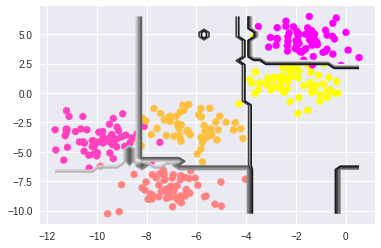

In [3]:
from sklearn import ensemble, model_selection

X, y = datasets.make_blobs(n_samples=300, centers=5, n_features=2, random_state=1)

clf = ensemble.RandomForestClassifier()
clf.fit(X, y)
clf.score(X,y)

ml_plot(X, y, clf)

## 引申介绍 Adaboosting

特点：

    不改变所给的训练数据，而**不断改变训练数据权值的分布**，使得训练数据在基本分类器的学习中起不同的作用。
    
步骤总结：

    找出误分类的数据，更新训练数据权值 -> 在此权值上训练新的弱分类器（策略为最小化分类误差率）-> 继续更新训练权值，继续训练弱分类器 -> 不断循环 -> 最终得到基本分类器的集成

**Adaboosting优点**

一、           adaboost是一种有很高精度的分类器。(霄栋：大家都这么说，虽然我实测有时候表现不好。。。 )

二、           可以使用各种方法构建子分类器，Adaboost算法提供的是框架。

三、           当使用简单分类器时，计算出的结果是可以理解的。而且弱分类器构造极其简单。

四、           不用担心overfitting。

**Adaboost的主要缺点有：**

1）对异常样本敏感，异常样本在迭代中可能会获得较高的权重，影响最终的强学习器的预测准确性。

2) 无法并行，每个预测器只能在前一个预测器完成之后才能开始训练。
    

0.78
[0.7        0.95       0.73333333 0.61666667 0.93333333]


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.71 	 [0.59 0.8  0.74]


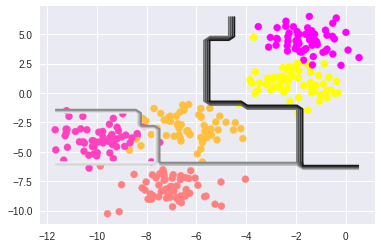

In [4]:
from sklearn import ensemble

X, y = datasets.make_blobs(n_samples=300, centers=5, n_features=2, random_state=1)

clf = ensemble.AdaBoostClassifier(algorithm='SAMME.R', learning_rate=2)
clf.fit(X,y)
print(clf.score(X,y))
print(model_selection.cross_val_score(clf, X, y, cv=5))

ml_plot(X, y, clf)

### 提升树


提升树是以分类树或回归树为基本分类器的提升方法，被认为是统计学习中性能最好的方法之一。

在当前模型的值，提升算法中的**残差**（预测值与真实值的差异，成为参差）。

梯度提升决策树简称 **GBDT(Gradient Boosting Decision Tree)**。

### sklearn 实战： GBDT 表现可嘉

1.0
[0.95       0.98333333 0.9        0.95       0.93333333]


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9333333333333332 	 [0.94 0.91 0.95]


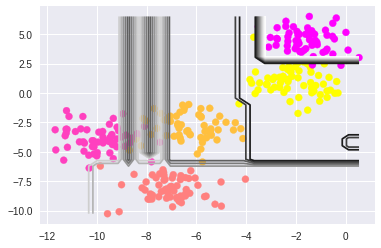

In [5]:
from sklearn import ensemble

X, y = datasets.make_blobs(n_samples=300, centers=5, n_features=2, random_state=1)

clf = ensemble.GradientBoostingClassifier()
clf.fit(X,y)
print(clf.score(X,y))
print(model_selection.cross_val_score(clf, X, y, cv=5))

ml_plot(X, y, clf, ngrid=30)

# 作业：

1. 测试目前学到的 Classifier 的 performance。

    对以下几种模型：
        logestic 回归
        linear SVC
        rbf SVC
        决策树
        随机森林
        AdaBoost
        提升树 GBDT
        n_neighbor = 5 的 knn
        单层 200 个 neuron 的 neural_network
        
    
    测试它们以下数据集的表现：
        iris 
        digits
        500 个点的 make_circles （建议 factor=.5, noise=.2)
        500 个点  make_blob (建议 n_samples=500, centers = 3, cluster_std=2)
        500 个点  make_moons (生成月牙状区域，建议n_samples=500, noise=0.1)
        
    请做到：
    
        打印 model_selection.cross_val_score() 结果
        
        把 validation 的结果作图，形象地演示（如，横坐表示不同的模型，纵坐标为 score）
        
        对后面两个数据集，绘制 contour 图

In [19]:
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neural_network
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes

In [20]:
def ml_plot(X, y, clf, ngrid=50, title=''):

    fig, ax = subplots()
    ax.scatter(X[:,0], X[:,1], c=y, cmap = 'spring')

    clf.fit(X,y)
    scores = model_selection.cross_val_score(clf, X, y)
    print('Evaluation result:\n\t', mean(scores), '\t', scores)

    x = np.linspace(min(X[:,0]), max(X[:,0]), ngrid)
    y = np.linspace(min(X[:,0]), max(X[:,0]), ngrid)
    yy, xx = np.meshgrid(y, x)
    P = np.zeros_like(xx)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.predict([[xi, yj]])
    # plot the margins
    ax.contour(xx, yy, P,) #colors='k',
               #levels=[-1, 0, 1], alpha=0.5,
               #linestyles=['--', '-', '--'])
    
    if title != '':
        ax.set_title(title, fontsize=14)
    plt.show()

def ml_clf_compare(X,y, title='', printinfo=True, cv=5):
    rlts = []
    labels = []
    
    for clf, label in [  
        
            [linear_model.LogisticRegressionCV(), 'logistic reg'],
            #[naive_bayes.GaussianNB(), 'naieve bayes'],
            [SVC(kernel='rbf'),  'rbf svm'],
            [SVC(kernel='linear'), 'linear svm'],
            [tree.DecisionTreeClassifier(), 'decision tree'],
            [ensemble.RandomForestClassifier(), 'random forest'],
            [ensemble.AdaBoostClassifier(learning_rate=1.5), 'AdaBoost'],
            [ensemble.GradientBoostingClassifier(), 'Gradient Boosting \n Decision Tree (GBDT)'],
            [neural_network.MLPClassifier(hidden_layer_sizes=(200,)), 'neural network\n(200 neurons)'],
            [neighbors.KNeighborsClassifier(n_neighbors=5), 'knn (5 neighbors)'],
        ]:
    
        rlt = model_selection.cross_val_score(clf, X, y, cv=cv)
        rlts.append([xx for xx in rlt]); labels.append(label)
        if len(X[0]) == 2:
            ml_plot(X, y, clf, ngrid=50, title=label)
    
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(111)
    for i, rlt in enumerate(rlts):
        xs, ys = [i+row*0.05 for row in range(len(rlt))], rlt
        ax.scatter(xs, ys, label = labels[i])
        if printinfo: print(labels[i], '\n\t', mean(rlt), '\t', rlt)
    ax.set_xticks(range(len(rlts)))
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylabel('accuracy score', fontsize=22)
    fig.suptitle(title, fontsize=24)
    plt.show()

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: Fu

Evaluation result:
	 0.426061388410786 	 [0.41071429 0.39759036 0.46987952]


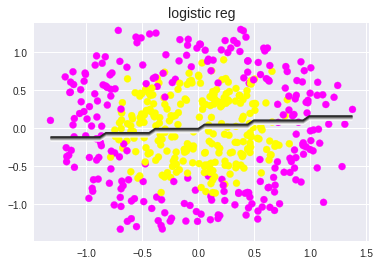

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

Evaluation result:
	 0.9140371007840887 	 [0.9047619  0.89156627 0.94578313]


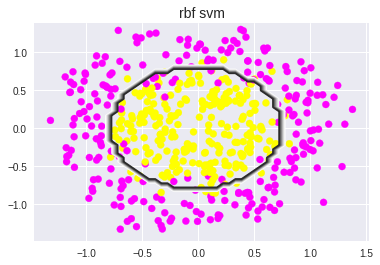

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.4940954293363932 	 [0.4702381  0.51807229 0.4939759 ]


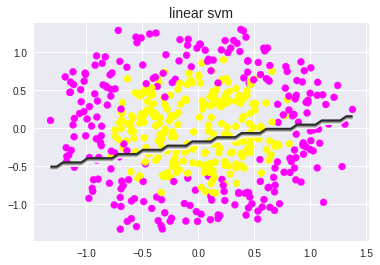

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.8760518263530312 	 [0.86309524 0.86144578 0.90361446]


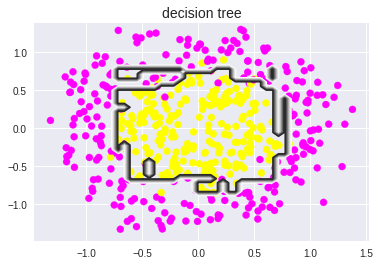

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

Evaluation result:
	 0.8820759227385734 	 [0.86309524 0.86144578 0.92168675]


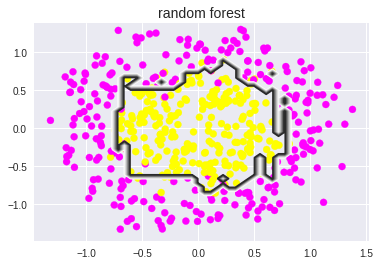

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.8960604322050104 	 [0.88095238 0.87349398 0.93373494]


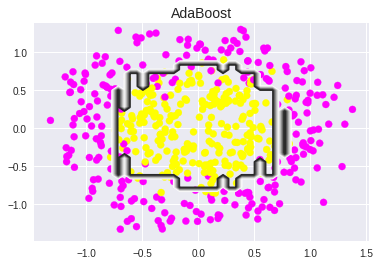

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.8780598584815452 	 [0.86309524 0.87349398 0.89759036]


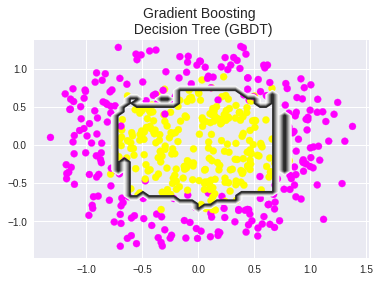

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

Evaluation result:
	 0.9020606234461656 	 [0.88690476 0.89759036 0.92168675]


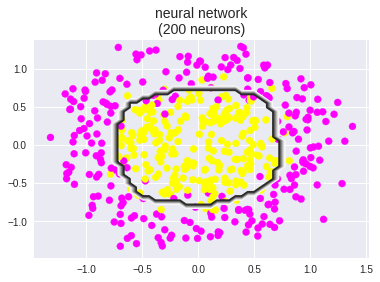

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.8960126219162364 	 [0.89285714 0.88554217 0.90963855]


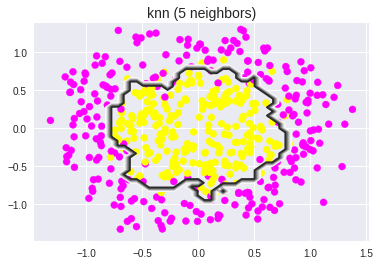

logistic reg 
	 0.47000000000000003 	 [0.39, 0.53, 0.42, 0.5, 0.51]
rbf svm 
	 0.9120000000000001 	 [0.89, 0.9, 0.91, 0.94, 0.92]
linear svm 
	 0.534 	 [0.47, 0.56, 0.52, 0.57, 0.55]
decision tree 
	 0.8720000000000001 	 [0.84, 0.88, 0.87, 0.87, 0.9]
random forest 
	 0.8939999999999999 	 [0.87, 0.91, 0.85, 0.93, 0.91]
AdaBoost 
	 0.8880000000000001 	 [0.85, 0.9, 0.87, 0.9, 0.92]
Gradient Boosting 
 Decision Tree (GBDT) 
	 0.882 	 [0.88, 0.88, 0.86, 0.88, 0.91]
neural network
(200 neurons) 
	 0.9119999999999999 	 [0.88, 0.91, 0.92, 0.94, 0.91]
knn (5 neighbors) 
	 0.892 	 [0.85, 0.9, 0.88, 0.92, 0.91]


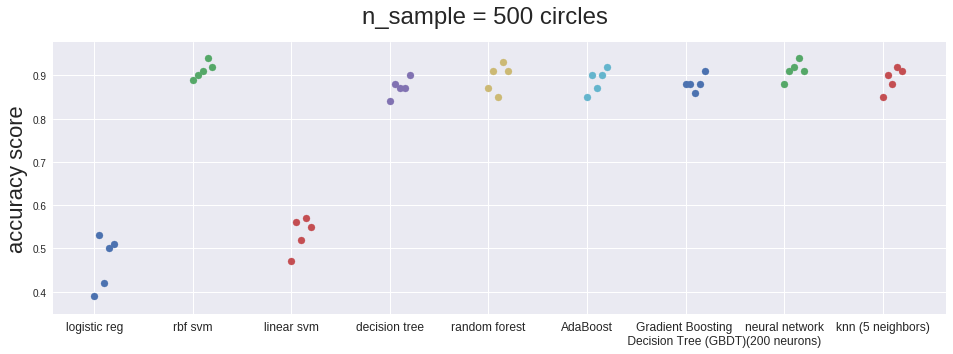

In [21]:
X, y = datasets.make_circles(n_samples=500, factor=.5, noise=.2)

ml_clf_compare(X, y, 'n_sample = 500 circles')

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

logistic reg 
	 0.9399999999999998 	 [0.9, 0.9666666666666667, 0.9333333333333333, 0.9, 1.0]
rbf svm 
	 0.9800000000000001 	 [0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]
linear svm 
	 0.9800000000000001 	 [0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]
decision tree 
	 0.9666666666666668 	 [0.9666666666666667, 0.9666666666666667, 0.9, 1.0, 1.0]
random forest 
	 0.96 	 [0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]
AdaBoost 
	 0.9533333333333334 	 [0.9666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 1.0]
Gradient Boosting 
 Decision Tree (GBDT) 
	 0.9533333333333334 	 [0.9666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 1.0]
neural network
(200 neurons) 
	 0.9733333333333334 	 [1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0]
knn (5 neighbors) 
	 0.9733333333333334 	 [0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0]


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


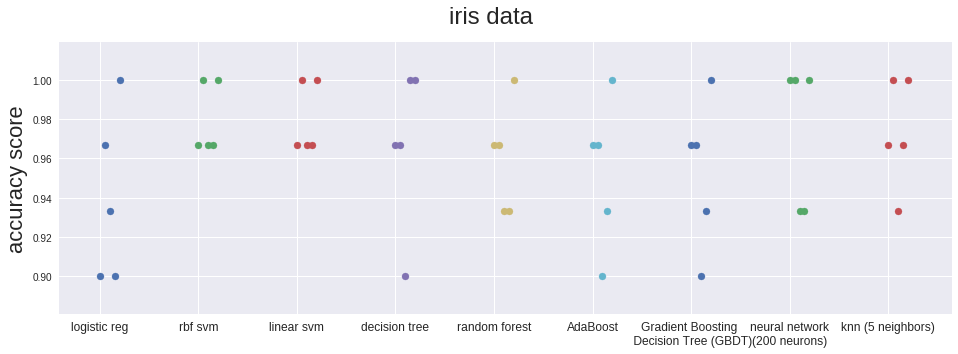

In [22]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
ml_clf_compare(X, y, 'iris data', True)

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWar

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Conver

logistic reg 
	 0.9299288279424083 	 [0.9313186813186813, 0.8977900552486188, 0.9442896935933147, 0.9663865546218487, 0.9098591549295775]
rbf svm 
	 0.44878680061604637 	 [0.4340659340659341, 0.4088397790055249, 0.415041782729805, 0.48739495798319327, 0.49859154929577465]
linear svm 
	 0.9493348726211526 	 [0.9642857142857143, 0.9226519337016574, 0.9665738161559888, 0.9635854341736695, 0.9295774647887324]
decision tree 
	 0.773771475316438 	 [0.7664835164835165, 0.6850828729281768, 0.7966573816155988, 0.8375350140056023, 0.7830985915492957]
random forest 
	 0.8955418088531895 	 [0.8763736263736264, 0.850828729281768, 0.9331476323119777, 0.9187675070028011, 0.8985915492957747]
AdaBoost 
	 0.29031857301084796 	 [0.21703296703296704, 0.27071823204419887, 0.30919220055710306, 0.29971988795518206, 0.35492957746478876]
Gradient Boosting 
 Decision Tree (GBDT) 
	 0.9243661545831536 	 [0.9148351648351648, 0.8977900552486188, 0.958217270194986, 0.9495798319327731, 0.9014084507042254]
neural net

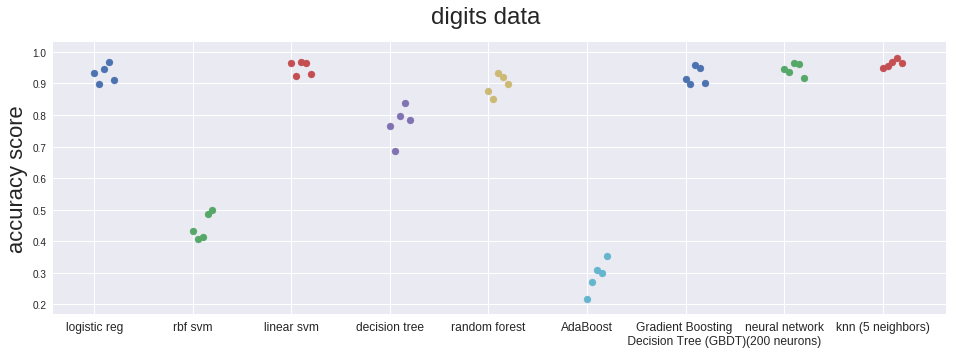

In [23]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
ml_clf_compare(X, y, 'digits data')

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

Evaluation result:
	 0.9158628630185518 	 [0.93452381 0.92215569 0.89090909]


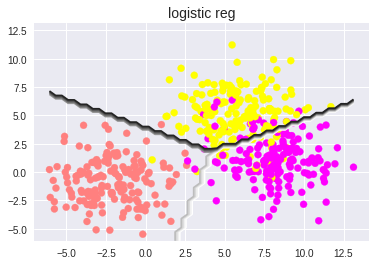

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

Evaluation result:
	 0.9178588710025837 	 [0.93452381 0.92814371 0.89090909]


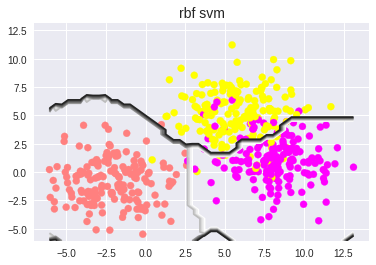

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9118585340142227 	 [0.92857143 0.92215569 0.88484848]


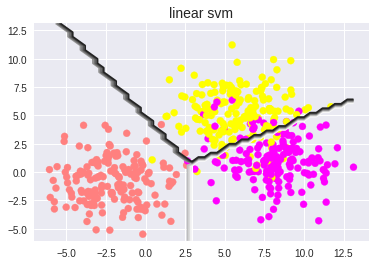

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.8658522781277272 	 [0.89285714 0.86227545 0.84242424]


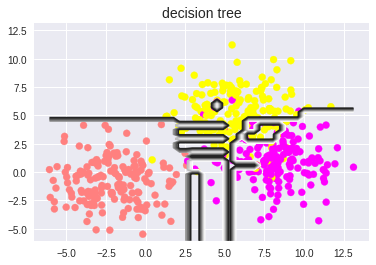

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

Evaluation result:
	 0.901830538058083 	 [0.94047619 0.88622754 0.87878788]


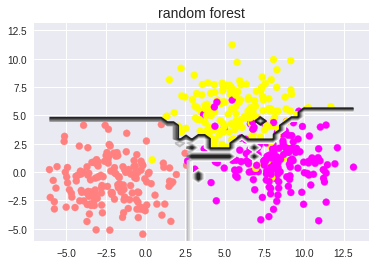

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.7839645384555564 	 [0.80952381 0.75449102 0.78787879]


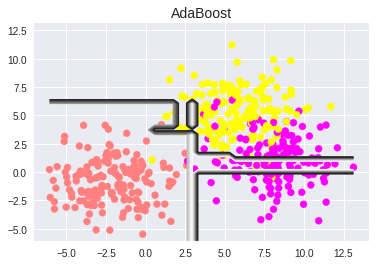

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.89383376104933 	 [0.92261905 0.89221557 0.86666667]


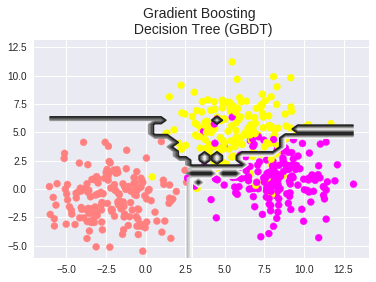

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

Evaluation result:
	 0.9118704150141276 	 [0.92261905 0.92814371 0.88484848]


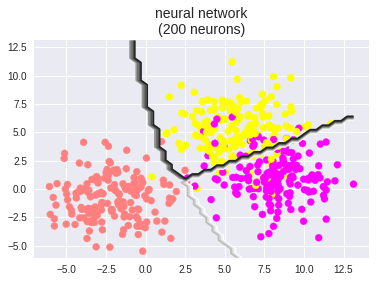

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9137942729260095 	 [0.93452381 0.93413174 0.87272727]


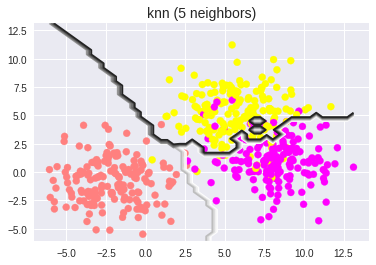

logistic reg 
	 0.9138066747851255 	 [0.9215686274509803, 0.9504950495049505, 0.9494949494949495, 0.8585858585858586, 0.8888888888888888]
rbf svm 
	 0.9097662707447215 	 [0.9215686274509803, 0.9504950495049505, 0.9393939393939394, 0.8585858585858586, 0.8787878787878788]
linear svm 
	 0.9097662707447215 	 [0.9215686274509803, 0.9504950495049505, 0.9393939393939394, 0.8585858585858586, 0.8787878787878788]
decision tree 
	 0.8797226781501679 	 [0.9117647058823529, 0.900990099009901, 0.9090909090909091, 0.8585858585858586, 0.8181818181818182]
random forest 
	 0.9037056646841155 	 [0.9215686274509803, 0.9504950495049505, 0.9191919191919192, 0.8585858585858586, 0.8686868686868687]
AdaBoost 
	 0.7943853208850296 	 [0.7647058823529411, 0.7425742574257426, 0.8787878787878788, 0.8383838383838383, 0.7474747474747475]
Gradient Boosting 
 Decision Tree (GBDT) 
	 0.889743680250378 	 [0.9117647058823529, 0.9207920792079208, 0.898989898989899, 0.8484848484848485, 0.8686868686868687]
neural network
(20

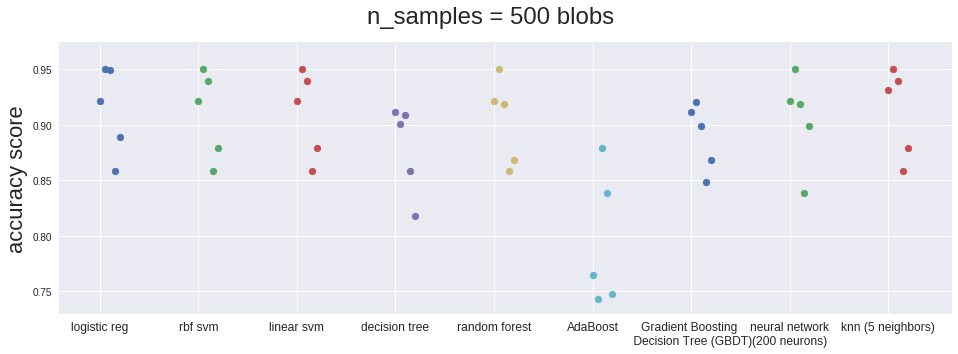

In [24]:
X, y = datasets.make_blobs(n_samples=500, centers = 3, cluster_std=2)

ml_clf_compare(X, y, 'n_samples = 500 blobs')

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: Fu

Evaluation result:
	 0.8839166188563778 	 [0.9047619  0.87951807 0.86746988]


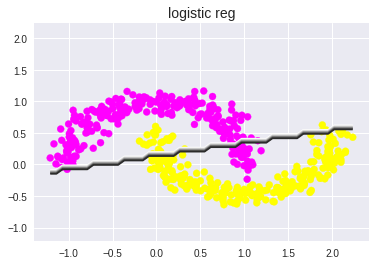

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

Evaluation result:
	 0.9859915853891758 	 [0.98809524 0.97590361 0.9939759 ]


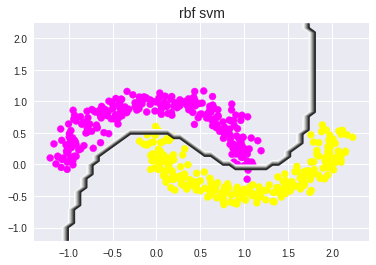

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.8799244597437369 	 [0.89880952 0.87349398 0.86746988]


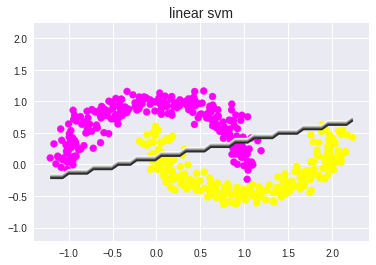

Evaluation result:
	 0.9859915853891758 	 [0.98809524 0.98192771 0.98795181]


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


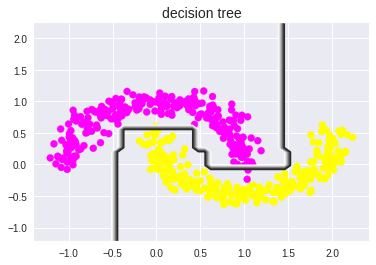

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

Evaluation result:
	 0.9839596481162746 	 [0.99404762 0.97590361 0.98192771]


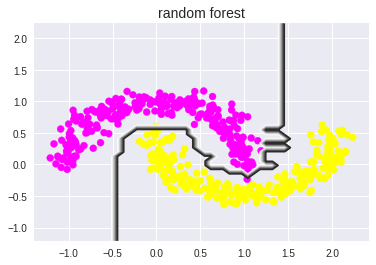

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9899598393574297 	 [1.         0.98192771 0.98795181]


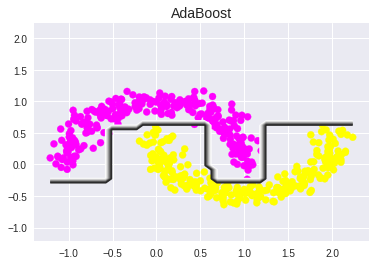

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9960078408873589 	 [0.99404762 0.9939759  1.        ]


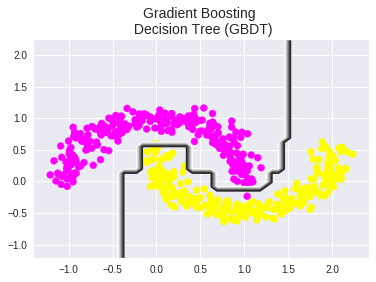

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

Evaluation result:
	 0.9159256071906673 	 [0.93452381 0.89759036 0.91566265]


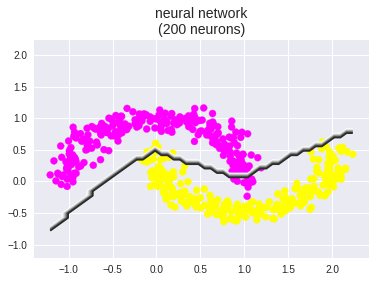

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Evaluation result:
	 0.9979919678714859 	 [1.        0.9939759 1.       ]


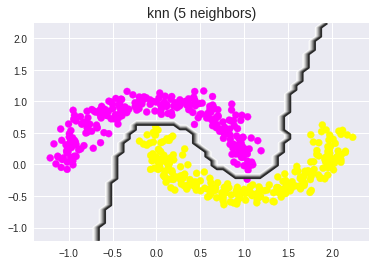

logistic reg 
	 0.8800000000000001 	 [0.93, 0.86, 0.91, 0.86, 0.84]
rbf svm 
	 0.9879999999999999 	 [0.99, 0.98, 1.0, 0.97, 1.0]
linear svm 
	 0.876 	 [0.93, 0.86, 0.9, 0.86, 0.83]
decision tree 
	 0.984 	 [0.99, 0.98, 0.98, 0.98, 0.99]
random forest 
	 0.9800000000000001 	 [1.0, 0.96, 0.97, 0.99, 0.98]
AdaBoost 
	 0.986 	 [0.99, 0.99, 0.97, 1.0, 0.98]
Gradient Boosting 
 Decision Tree (GBDT) 
	 0.992 	 [0.99, 0.98, 1.0, 1.0, 0.99]
neural network
(200 neurons) 
	 0.916 	 [0.97, 0.87, 0.91, 0.93, 0.9]
knn (5 neighbors) 
	 0.998 	 [1.0, 0.99, 1.0, 1.0, 1.0]


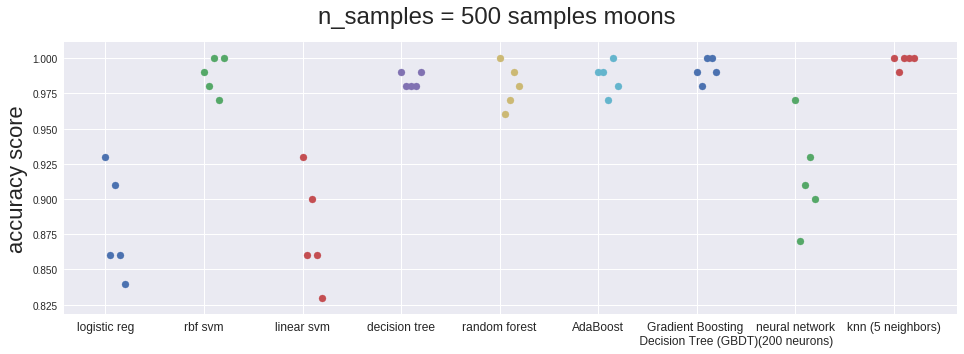

In [25]:
X, y = datasets.make_moons(500, noise=0.1)

ml_clf_compare(X, y, 'n_samples = 500 samples moons')